<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [ ]:
# read data and check how many class in train set

In [ ]:
pwd 

'/content'

In [ ]:
my_data_dir = "/content/drive/MyDrive/Colab Notebooks/data/data"

In [ ]:
os.listdir(my_data_dir)

['train', 'test', 'validation']

In [ ]:
val_path = my_data_dir+'/validation/' # local windowsta çalışırken \\ kullanılması gerekiyor. \\home\\user\\...
train_path = my_data_dir+'/train/'
test_path = my_data_dir+'/test/'

In [ ]:
os.listdir(val_path)

['dog', 'cat']

In [ ]:
os.listdir(train_path)

['cat', 'dog']

**Let's check how many images there are.**

In [ ]:
os.listdir(train_path)

['cat', 'dog']

In [ ]:
#number of cat images in train set
len(os.listdir(train_path+'cat'))

12500

In [ ]:
#number of dog images in train set
len(os.listdir(train_path+'dog'))

5026

In [ ]:
cat_image = train_path+'cat/'+os.listdir(train_path+'cat')[0]
dog_image = train_path+'dog/'+os.listdir(train_path+'dog')[1]

In [ ]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes


In [ ]:
cat_image

'/content/drive/MyDrive/Colab Notebooks/data/data/train/cat/cat.9104.jpg'

In [ ]:
os.listdir(train_path+'cat')[0]

'cat.9104.jpg'

In [ ]:
one_cat = train_path+'cat'+'/cat.9104.jpg'

In [ ]:
#show cat image
imread(one_cat) # okuyor ve arraye dönüştürüyor.

array([[[182, 183, 185],
        [182, 183, 185],
        [183, 184, 186],
        ...,
        [171, 171, 171],
        [170, 170, 170],
        [170, 170, 170]],

       [[182, 183, 185],
        [182, 183, 185],
        [183, 184, 186],
        ...,
        [171, 171, 171],
        [170, 170, 170],
        [170, 170, 170]],

       [[183, 184, 186],
        [183, 184, 186],
        [183, 184, 186],
        ...,
        [171, 171, 171],
        [171, 171, 171],
        [171, 171, 171]],

       ...,

       [[165, 165, 165],
        [165, 165, 165],
        [164, 164, 164],
        ...,
        [ 33,  26,  20],
        [ 35,  28,  22],
        [ 37,  30,  24]],

       [[165, 165, 165],
        [165, 165, 165],
        [164, 164, 164],
        ...,
        [ 32,  25,  19],
        [ 35,  28,  22],
        [ 37,  30,  24]],

       [[165, 165, 165],
        [165, 165, 165],
        [164, 164, 164],
        ...,
        [ 32,  25,  19],
        [ 34,  27,  21],
        [ 36,  29,  23]]

In [ ]:
cat_img= imread(one_cat)

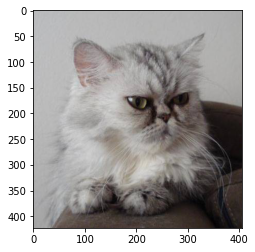

In [ ]:
plt.imshow(cat_img)

In [ ]:
os.listdir(train_path+"dog")[1]


'dog.2218.jpg'

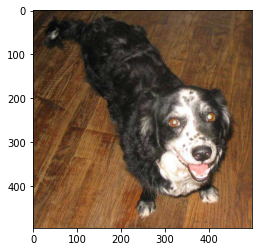

In [ ]:
#show dog image
one_dog = train_path+'dog'+'/dog.2218.jpg'
dog_img= imread(one_dog)
plt.imshow(dog_img)

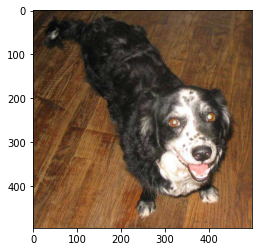

In [ ]:
dog_image=imread(dog_image)
plt.imshow(dog_image)

**Let's decide on the final dimension of these images.**

In [ ]:
dog_img.shape # RGB

(496, 499, 3)

In [ ]:
cat_img.shape

(423, 406, 3)

In [ ]:
x= []
y = []
for image in os.listdir(train_path+"cat"): # dog ve cat için ayrı ayrı bakablirsin
    
    img = imread(train_path+"cat/"+image)
    d1,d2, _ = img.shape # image boyutları farklı
    x.append(d1)
    y.append(d2)

In [ ]:
x

[499,
 280,
 386,
 375,
 328,
 357,
 316,
 374,
 374,
 374,
 375,
 374,
 253,
 500,
 375,
 207,
 378,
 293,
 270,
 312,
 375,
 370,
 309,
 374,
 499,
 333,
 448,
 499,
 409,
 375,
 199,
 399,
 375,
 374,
 374,
 374,
 374,
 374,
 451,
 500,
 489,
 262,
 261,
 374,
 374,
 335,
 399,
 375,
 358,
 375,
 135,
 240,
 499,
 150,
 239,
 375,
 486,
 228,
 374,
 500,
 378,
 375,
 287,
 500,
 500,
 270,
 448,
 445,
 239,
 373,
 374,
 239,
 500,
 499,
 232,
 375,
 269,
 400,
 225,
 499,
 500,
 500,
 441,
 375,
 304,
 389,
 240,
 424,
 331,
 436,
 500,
 218,
 317,
 100,
 349,
 270,
 263,
 500,
 458,
 499,
 390,
 499,
 339,
 354,
 282,
 142,
 500,
 332,
 374,
 500,
 374,
 309,
 369,
 330,
 461,
 332,
 375,
 342,
 451,
 499,
 335,
 375,
 234,
 291,
 346,
 499,
 374,
 236,
 455,
 374,
 383,
 375,
 262,
 299,
 349,
 273,
 375,
 239,
 374,
 375,
 451,
 375,
 457,
 413,
 375,
 307,
 375,
 374,
 349,
 313,
 375,
 226,
 427,
 199,
 287,
 170,
 405,
 281,
 375,
 399,
 375,
 499,
 226,
 269,
 116,
 320,
 458

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


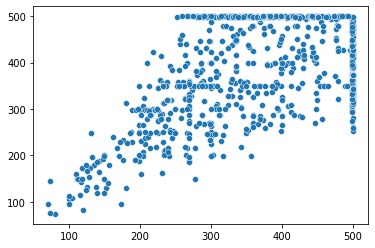

In [ ]:
sns.scatterplot(x,y)

In [ ]:
np.mean(x)

356.46712

In [ ]:
np.mean(y)

410.52264

In [ ]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (360,400,3)

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [ ]:
#use ImageDataGenerator to manipulate the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dog_img.max() # 255 max değeri R veya G veya B kanalında olabilir.

255

In [ ]:
cat_img.max() # scale edilmemiş veri

233

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.10,  # maximum genişlik oranı
                               height_shift_range=0.10, # boyunu % 10 dan fazla kaydırma
                               rescale=1/255,           # image scale edilmediğinde kullanılır.
                               shear_range=0.1, 
                               zoom_range=0.1,          # maximum zoom oranı
                               horizontal_flip=True, # flip true veya false oluyor, oran yok 
                               fill_mode='nearest')
                               #smart_resize boyutun ratio, distorted bozmadan yapılıyor. orjinal veri  modele verilmiyor.


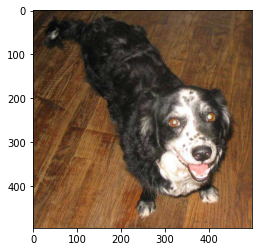

In [ ]:
#show transfromed version of dog image
plt.imshow(dog_img)

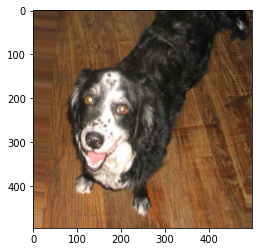

In [ ]:
plt.imshow(image_gen.random_transform(dog_img)) # zoom + rotation

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [ ]:
image_gen.flow_from_directory(val_path) # klasöre ait verileri okuyor. Resimlerin yeri, class ve adını biliyor, sırası geldiğinde okuyacak batch, batch

Found 2290 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(train_path)

Found 17526 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 0 images belonging to 0 classes.


# Creating the Model

In [ ]:
#create your CNN model here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())


model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

NameError: ignored

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18347704483961036111
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11320098816
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 12894073624907289436
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
 xla_global_id: 416903419]

In [ ]:
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
# model.add(MaxPooling2D(pool_size=(2, 2)))


# model.add(Flatten())


# model.add(Dense(128))
# model.add(Activation('relu'))

# model.add(Dropout(0.5))

# model.add(Dense(1))
# model.add(Activation('sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [ ]:
model.summary() # model parametre sayısı azaltılabilir

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 358, 398, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 179, 199, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 177, 197, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 88, 98, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 86, 96, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 43, 48, 64)       0

## Early Stopping

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
batch_size = 32 

In [ ]:
#use image_gen from above and read iamges from train and test set

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(360,400),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

Found 17526 images belonging to 2 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=(360,400),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42) # eğitimde Shuffle True yapıyoruz, predict yaparfen false olmalı

Found 2290 images belonging to 2 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False, seed=42)

Found 0 images belonging to 0 classes.


In [ ]:
#show class indices in train set
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
val_image_gen.class_indices

{'cat': 0, 'dog': 1}

## Model Training

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
step_size_train=train_image_gen.n//train_image_gen.batch_size # batch işlemi sonunda artık değer kalırsa kullanma.
step_size_val=val_image_gen.n//val_image_gen.batch_size
step_size_test=test_image_gen.n//val_image_gen.batch_size

In [ ]:
step_size_train, step_size_val

(547, 71)

In [ ]:
#fit your model using train and validation set
results = model.fit(train_image_gen,epochs=20,
                    validation_data=val_image_gen, 
                    steps_per_epoch=step_size_train,# 
                    validation_steps=step_size_val,
                    callbacks=[early_stop])

Epoch 1/20
547/547 [==============================] - 3705s 7s/step - loss: 0.6039 - accuracy: 0.7160 - val_loss: 0.7214 - val_accuracy: 0.5748
Epoch 2/20
547/547 [==============================] - 769s 1s/step - loss: 0.5418 - accuracy: 0.7453 - val_loss: 0.6409 - val_accuracy: 0.6571
Epoch 3/20
547/547 [==============================] - 732s 1s/step - loss: 0.4860 - accuracy: 0.7785 - val_loss: 0.5391 - val_accuracy: 0.7390
Epoch 4/20
547/547 [==============================] - 713s 1s/step - loss: 0.4431 - accuracy: 0.7992 - val_loss: 0.5121 - val_accuracy: 0.7601
Epoch 5/20
547/547 [==============================] - 720s 1s/step - loss: 0.4241 - accuracy: 0.8102 - val_loss: 0.6027 - val_accuracy: 0.7315
Epoch 6/20
547/547 [==============================] - 760s 1s/step - loss: 0.4169 - accuracy: 0.8177 - val_loss: 0.4676 - val_accuracy: 0.7914
Epoch 7/20
547/547 [==============================] - 762s 1s/step - loss: 0.3989 - accuracy: 0.8215 - val_loss: 0.5823 - val_accuracy: 0.715

In [ ]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.603932,0.715960,0.721432,0.574824
1,0.541769,0.745341,0.640922,0.657130
2,0.486009,0.778495,0.539124,0.738997
3,0.443071,0.799245,0.512125,0.760123
4,0.424056,0.810221,0.602706,0.731514


# Evaluating the Model

In [ ]:
losses = pd.DataFrame(summary.loss, summary.val_loss)

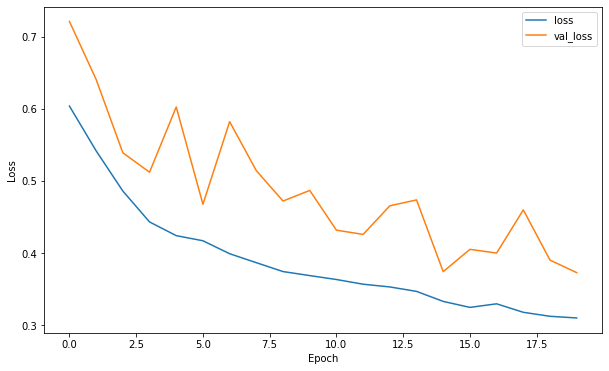

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

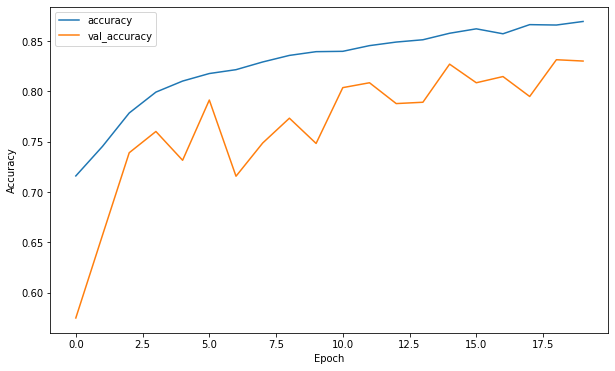

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(val_image_gen,
steps=step_size_val)

71/71 [==============================] - 89s 1s/step - loss: 0.3826 - accuracy: 0.8371


[0.38258761167526245, 0.8371478915214539]

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42) # prediction shuffle False olmalı

Found 2290 images belonging to 2 classes.


In [ ]:
pred_probabilities = model.predict_generator(val_image_gen)

In [ ]:
pred_probabilities

array([[0.044494  ],
       [0.04975203],
       [0.14317203],
       ...,
       [0.97140694],
       [0.8137139 ],
       [0.8951267 ]], dtype=float32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

array([[ True],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions[:100]

array([[ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.53      0.62      0.57      1219
           1       0.46      0.37      0.41      1071

    accuracy                           0.50      2290
   macro avg       0.49      0.49      0.49      2290
weighted avg       0.50      0.50      0.49      2290



In [ ]:
confusion_matrix(val_image_gen.classes,predictions)

array([[754, 465],
       [676, 395]])

In [ ]:
from tensorflow.keras.models import load_model
model.save('cat_dog_detector.h5')

# Predicting on an Image

In [ ]:
from PIL import Image

In [ ]:
model=load_model('cat_dog_detector.h5')

In [ ]:
#read 2748.jpg from test set
cat_new = test_path+os.listdir(test_path)[2748]
cat_new


'/content/drive/MyDrive/Colab Notebooks/data/data/test/4923.jpg'

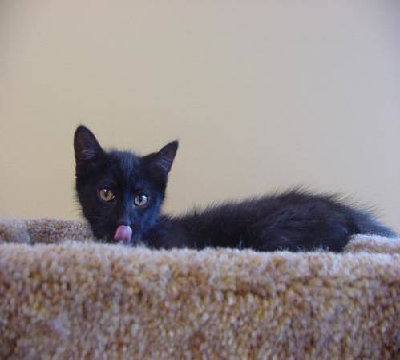

In [ ]:
cat_new= image.load_img(cat_new,target_size=image_shape)
cat_new
# resize
#tf.keras.preprocessing.image.smart_resize(my_image, image_shape)

In [ ]:
type(cat_new)

PIL.Image.Image

In [ ]:
# turn the image into numpy array
cat_new = image.img_to_array(cat_new)
cat_new

array([[[160., 150., 140.],
        [160., 150., 140.],
        [162., 152., 142.],
        ...,
        [157., 155., 168.],
        [157., 154., 171.],
        [156., 153., 170.]],

       [[160., 150., 140.],
        [161., 151., 141.],
        [162., 152., 142.],
        ...,
        [157., 155., 168.],
        [157., 154., 171.],
        [156., 153., 170.]],

       [[161., 151., 141.],
        [161., 151., 141.],
        [163., 153., 143.],
        ...,
        [158., 156., 169.],
        [158., 155., 172.],
        [157., 154., 171.]],

       ...,

       [[ 83.,  65.,  63.],
        [ 73.,  55.,  53.],
        [ 68.,  50.,  48.],
        ...,
        [ 69.,  51.,  39.],
        [ 76.,  59.,  52.],
        [ 76.,  59.,  52.]],

       [[ 90.,  72.,  70.],
        [ 74.,  56.,  54.],
        [ 67.,  49.,  47.],
        ...,
        [ 66.,  48.,  36.],
        [ 75.,  57.,  53.],
        [ 75.,  57.,  53.]],

       [[ 95.,  77.,  75.],
        [ 76.,  58.,  56.],
        [ 66.,  

In [ ]:
cat_new.shape

(360, 400, 3)

In [ ]:
#reshape it as below
cat_new = np.expand_dims(cat_new, axis=0)

In [ ]:
cat_new.shape

(1, 360, 400, 3)

In [ ]:
cat_new

array([[[[160., 150., 140.],
         [160., 150., 140.],
         [162., 152., 142.],
         ...,
         [157., 155., 168.],
         [157., 154., 171.],
         [156., 153., 170.]],

        [[160., 150., 140.],
         [161., 151., 141.],
         [162., 152., 142.],
         ...,
         [157., 155., 168.],
         [157., 154., 171.],
         [156., 153., 170.]],

        [[161., 151., 141.],
         [161., 151., 141.],
         [163., 153., 143.],
         ...,
         [158., 156., 169.],
         [158., 155., 172.],
         [157., 154., 171.]],

        ...,

        [[ 83.,  65.,  63.],
         [ 73.,  55.,  53.],
         [ 68.,  50.,  48.],
         ...,
         [ 69.,  51.,  39.],
         [ 76.,  59.,  52.],
         [ 76.,  59.,  52.]],

        [[ 90.,  72.,  70.],
         [ 74.,  56.,  54.],
         [ 67.,  49.,  47.],
         ...,
         [ 66.,  48.,  36.],
         [ 75.,  57.,  53.],
         [ 75.,  57.,  53.]],

        [[ 95.,  77.,  75.],
       

In [ ]:
#predict the image class with your model
model.predict(cat_new)

array([[2.0577803e-08]], dtype=float32)

In [ ]:
train_image_gen.class_indices


{'cat': 0, 'dog': 1}

In [ ]:
test_image_gen.class_indices # val?


{'cat': 0, 'dog': 1}